In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diagnostic.csv')
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
x = df.drop('DEATH_EVENT', axis=1)

In [7]:
y = df['DEATH_EVENT']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

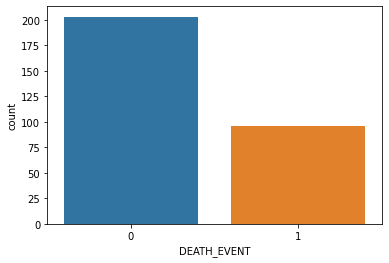

In [9]:
sb.countplot(x = 'DEATH_EVENT', data = df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

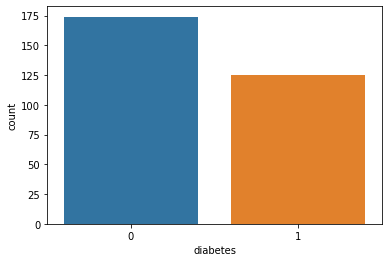

In [10]:
sb.countplot(x='diabetes',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

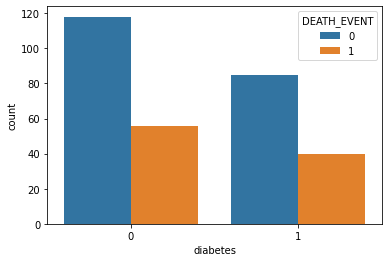

In [11]:
sb.countplot(x='diabetes',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

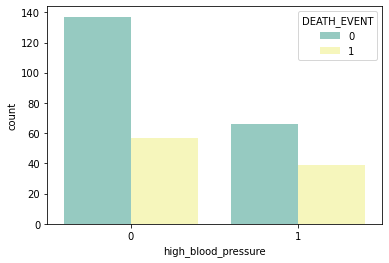

In [12]:
sb.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT',palette="Set3")

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
d_tree = DecisionTreeClassifier()

In [17]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
x_test.shape

(90, 12)

In [19]:
x_train.shape

(209, 12)

In [20]:
pred = d_tree.predict(x_test)

In [21]:
pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [22]:
y_test

195    1
146    0
73     0
292    0
245    0
      ..
167    1
120    0
223    0
290    0
211    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [23]:
d_tree.score(x_test, y_test)

0.6777777777777778

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [25]:
cm = confusion_matrix(y_test, pred)
cm

array([[47, 22],
       [ 7, 14]], dtype=int64)

In [26]:
# cross check for decision tree score by Accuracy law
accuracy = (48 + 19) / (48 + 10 + 13 + 19)
accuracy

0.7444444444444445

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        69
           1       0.39      0.67      0.49        21

    accuracy                           0.68        90
   macro avg       0.63      0.67      0.63        90
weighted avg       0.76      0.68      0.70        90



In [28]:
features = x.columns
features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

<AxesSubplot:>

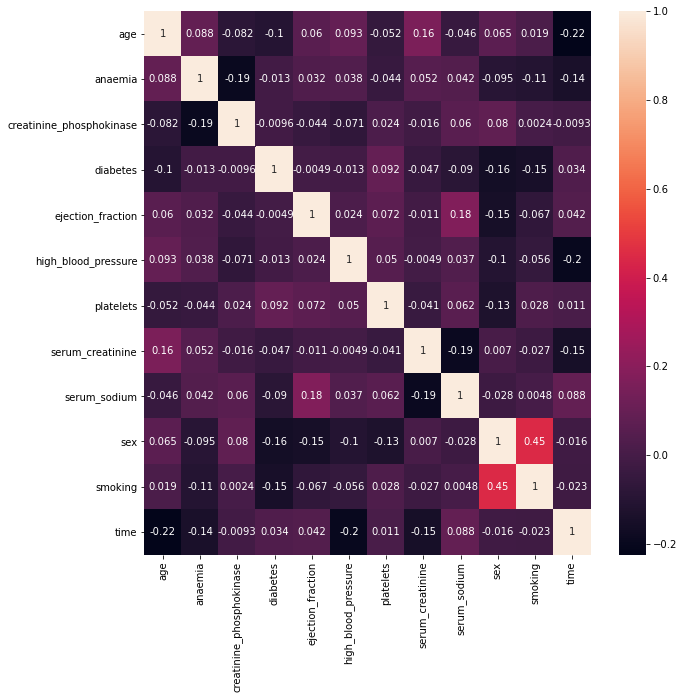

In [29]:
plt.figure(figsize=(10,10))
sb.heatmap(df[features].corr(), annot=True)

<AxesSubplot:>

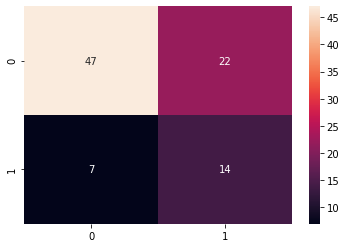

In [30]:
sb.heatmap(cm, annot=True)

In [31]:
#check accuracy score
accuracy_score(y_test, pred)

0.6777777777777778

# ROC
####  Receiver Operating Curve

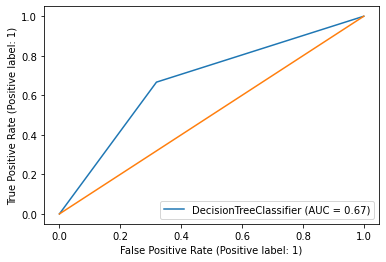

In [32]:
plot_roc_curve(d_tree,x_test,y_test)
plt.plot([0,1],[0,1])

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20), dpi=300)
tree.plot_tree(d_tree,filled=True,feature_names=features)

[Text(2113.9508928571427, 4303.5, 'time <= 73.5\ngini = 0.46\nsamples = 209\nvalue = [134, 75]'),
 Text(747.3214285714286, 3850.5, 'serum_sodium <= 136.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(332.1428571428571, 3397.5, 'ejection_fraction <= 57.5\ngini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(221.42857142857142, 2944.5, 'ejection_fraction <= 47.5\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(110.71428571428571, 2491.5, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(332.1428571428571, 2491.5, 'anaemia <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(221.42857142857142, 2038.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(442.85714285714283, 2038.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(442.85714285714283, 2944.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1162.5, 3397.5, 'serum_sodium <= 139.5\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(1051.7857142857142, 2944.5, 'platelets <= 213000.0\ngini = 0.494\nsamples

In [ ]:
text = tree.export_text(d_tree)
print(text)